In [1]:
import requests
import time 
from bs4 import BeautifulSoup
#from mechanize import Browser
import pandas as pd
from IPython.display import HTML

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
#!conda install -c conda-forge -y wordcloud

In [22]:
# Gets the first page

# Specify the search
area = "Data Science"
location = "California"
web_address='https://www.indeed.com/jobs?q='+area+'&l='+location

options = Options()
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-gpu")
options.add_argument("--remote-debugging-port=9222")

# Annoyingly I had to specify an exact driver version
# Driver manager should figure this out for me, but it didn't
# You should be able to just run: service = Service(ChromeDriverManager().install())
service = Service(ChromeDriverManager(driver_version="140.0.7339.185").install())
driver = webdriver.Chrome(service=service,options=options)

driver.get(web_address)
html_source_code = driver.execute_script("return document.body.innerHTML;")

# Save to beautiful soup
soup = BeautifulSoup(html_source_code, 'html.parser')

# Close page
driver.close()

In [23]:
# Get the names of the jobs
result2 = soup.find_all('h2', class_="jobTitle")
job_names = [r.text for r in result2]
print(len(job_names))
job_names

16


['FBI Special Agent: Data Science & Intelligence Expertise',
 'Staff PMO Business Analyst',
 'DATA SCIENTIST',
 'Scientist, Data Science (6 month contract)',
 'Data Scientist I',
 'Data Scientist I',
 'Associate Data Scientist / Data Scientist I',
 'Associate Data Scientist / Data Scientist I',
 'Analytics Data Engineer',
 'Data Scientist',
 'STEM Tutor',
 'Data & Analytics',
 'Data Scientist',
 'Data Analyst, Measurement Science',
 'Data Science Manager',
 'Junior Analyst - Funds Management']

In [24]:
# List of indeed links to the named jobs
result3 = soup.find_all('a', class_="jcs-JobTitle")
links = ['https://www.indeed.com' + r.get('href') for r in result3]
print(len(links))
links

16


['https://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0D5o2Oz3HqsSm2luAX6nIBL6zkznp9GLNwT6U20ynRgySuxkNALEzP-JLgS8JtleDfbsui1PF0sQgJpS7MwHxQRfZXgVBmszEwvf-OsZ1Dg5YgzihgLmryJzp4HMmcsW6Yx_saixz0hDAp5NWKJOIlAj4Svxd3JGPyHeRkSQ9XIg3lru7y1CvP_PhpsvEcSfzFvAJIoXwLM4fxRDp66yUtdp3UJkJfvLhhgXuc8PSyw2c2qSx_L5OoV56XpujhE2oJ4QGI-nBv_Lokt1W8CRaVNlj7djOk7AFjq6r5jwdc7Djhk-2HQViNX-hkWtdnSzPq6a6WSTyLjFy5_AWzaPIkuAAwqccZ89HhxL1oUUqko44x9p_RiNU__x2cLkcjzStrsb-xX74OZdllIL93lzpdX38qOxciqDaPwcygqPGqpB90vz6I046u0Wdo1qT-sEtHwKwxr78Hn8BqsbmugABSRpvdti-plXdTi1Q1pqeXvo1AD0YKhD0Ujf9oN15-C1-rbUJwpLRp3P-0fRPV3WCdIgF03NjJZ7CEFwcsPCrl0UfOAHbzNI58wcSZDqr4iKGr8WGameQa8-EJcGcI9Nx1OH8Priih1U_fcmR6LunEyfSD7hLafKXGH3MI0_zPahBBeTIFdeYjG_gPEUliLsY7Yh61YUjTyg_j3zPD9wh5x03HQYvmCmExsriZF_l67pOeddU4FUbDI3FR9mpUEJkU9oR1adW7eD_GU067429OZXwWMRP7AEYeo71sPydcJFBrGNV-H2DDKfxIX-OajpgEeWoBlQabuN5LQXQdjO2KaCnslbHWW1_IWVYGDo5ABOMhMiw70h1G4BUo-zvrHih5qpKWWBzOMXXwtRkIRjB-3DY0K7exAXi-TeKvWhXTWMbXjCD-Q17X5LrHfXS-KI3gfnTGPgHS4BJ_5M_kok_PIWfP151-Y

In [26]:
# I want to loop through each of the links above and get the full job descriptions
data = []

for link in links:
    driver = webdriver.Chrome(service=service,options=options)
    driver.get(link)

    html_source_code = driver.execute_script("return document.body.innerHTML;")

    # Save to beautiful soup
    soup_tmp = BeautifulSoup(html_source_code, 'html.parser')
    driver.close()
    
    job_info = soup_tmp.find_all('div', id="jobDescriptionText")
    for j in job_info:
        data.append(j.text)

## Make WordCloud From the Data

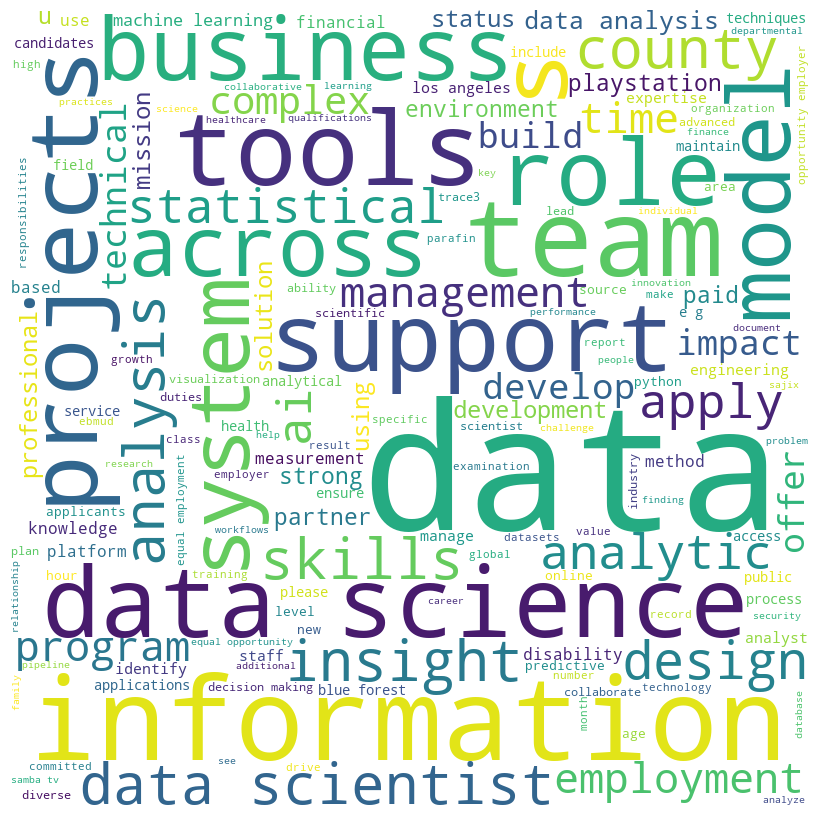

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
ADDWORDS = {'work',"need","location","working",
            "employee","will","benefits","compensation",
           "must", "may","company",'candidate','position','job', 'required','provide','including'
           "application",'employees','product','customer','including','San Francisco,''application',
           'planning','org','year','requirement','water','supply','application','years','project',
           'requirements','applicant','related','san','francisco','Experience'}
stopwords.update(ADDWORDS)
 
# iterate through the csv file
for val in data:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

name = "WordCloud_JobNames_" + '_search_' + area + '_' + location + '_' + '.png'
wordcloud.to_file(name)
 
plt.show()


## Now do what we just did but gather data from multiple pages

In [42]:
# THis takes a while and web browser will keep opening and closing
#---------- pass variables ---------------
area = "Data Science"
location = "California"
pages=8
removeNA=False
bachelors_only=True
min_salary = 50000

#---------- def function ----------------
JOBS = []

companies = []
cities = []
salaries = []
job_titles = []
links = []

sc = '&vjk=44c2856b496520b7'
for page in range(pages):
    if page ==0:
        web_address='https://www.indeed.com/jobs?q='+area + '+$' + str(min_salary) +'&l='+location
        if bachelors_only == True:
            web_address='https://www.indeed.com/jobs?q='+area+ '+$' + str(min_salary) +'&l='+location + sc  
    else:
        start_page = page*10
        web_address='https://www.indeed.com/jobs?q='+area+ '+$' + str(min_salary) +'&l='+location+'&start='+str(start_page)
        if bachelors_only == True:
            web_address='https://www.indeed.com/jobs?q='+area+ '+$' + str(min_salary) +'&l='+location + sc +'&start='+str(start_page)
            
    
    # Get the page data
    driver = webdriver.Chrome(service=service,options=options)
    driver.get(web_address)
    # wait a few seconds for the page to load
    time.sleep(3)
    html_source_code = driver.execute_script("return document.body.innerHTML;")
    soup = BeautifulSoup(html_source_code, 'html.parser')
    # Close page
    driver.close()
    
    # Save the job info Data Frame
    
    # Job Titles
    job_results = soup.find_all('h2', class_="jobTitle")
    jobs = [r.text for r in job_results]
    for j in jobs:
        job_titles.append(j)
    
    # Links to the named jobs
    link_results = soup.find_all('a', class_="jcs-JobTitle")
    tmp_links = ['https://www.indeed.com' + r.get('href') for r in link_results]
    for l in tmp_links:
        links.append(l)
    
    # Get company and salary info
    info_results = soup.find_all('td', class_="resultContent css-1o6lhys eu4oa1w0")
    for i in range(len(info_results)):
        tmp_company = info_results[i].find_all("span", {"data-testid": "company-name"})
        if tmp_company == []:
            tmp_company = 'NONE'
            companies.append(tmp_company)
        else:
            companies.append(tmp_company[0].text)
        
        tmp_location = info_results[i].find_all('div', {"data-testid": "text-location"})
        if tmp_location == []:
            tmp_location = 'NONE'
            cities.append(tmp_location)
        else:
            cities.append(tmp_location[0].text)
        tmp_salary = info_results[i].find_all('h2', class_="mosaic-provider-jobcards-5vqdjd e1tiznh50")
        if tmp_salary == []:
            tmp_salary = 'NA'
            salaries.append(tmp_salary)
        else:
            salaries.append(tmp_salary[0].text)
    
    
    for i, job in enumerate(job_titles): 
        company = companies[i]
        city = cities[i]
        salary = salaries[i]
        link = links[i]
        tmp = (job,
               company, 
               city,
               salary,
               link)
        JOBS.append(tmp)

# Create the results Data Frame
job_listings = pd.DataFrame(JOBS, 
                            columns=['Job',
                                     'Company',
                                     'Location',
                                     'Salary',
                                     'Link'],
                           index=[i+1 for i in range(len(JOBS))])

total_list = len(job_listings)
job_listings = job_listings.drop_duplicates(subset='Link')
unique_len = len(job_listings)
print("Removed {} duplicates".format(total_list-unique_len))


print("In the first {} pages: Found {} unique jobs matching {} in {} with a minimum salary {}".format(pages,job_listings.shape[0],area,location,min_salary))
if bachelors_only == True:
    print("Eductation = Bachelors Degree")
if removeNA==True:
    print("Removing jobs with NA salary...")
    job_listings = job_listings[job_listings.Salary!='NA'].copy().reset_index()
    print("Resulting in {} remaining jobs".format(job_listings.shape[0]))
    


job_listings

Removed 450 duplicates
In the first 8 pages: Found 126 unique jobs matching Data Science in California with a minimum salary 50000
Eductation = Bachelors Degree


,Job,Company,Location,Salary,Link
1,FBI Special Agent: Data Science & Intelligence...,Federal Bureau of Investigation,California,"$99,461 - $128,329",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,Data Scientist Mid-Level,Kiakahi,"San Diego, CA","$92,000 - $102,000",https://www.indeed.com/rc/clk?jk=d0ab97baf2303...
3,"Data Analyst, Measurement Science",SAMBA TV,"San Francisco, CA","$100,000 - $140,000",https://www.indeed.com/rc/clk?jk=352cb3ae21dad...
4,GEOGRAPHIC INFORMATION SYSTEMS ANALYST,Los Angeles County Department of Human Resources,"Los Angeles County, CA","$92,175.36 - $117,649.20",https://www.indeed.com/rc/clk?jk=6ebced63fedbc...
5,"Senior Data Scientist, Science",Chan Zuckerberg Initiative,"Hybrid work in Redwood City, CA","$190,000 - $261,800",https://www.indeed.com/rc/clk?jk=c5a4a251cb74a...
...,...,...,...,...,...
572,Assistant Manager - Data Analytics,"GLOVIS America, Inc.","Irvine, CA 92612 (San Joaquin Marsh area)","$86,000 - $96,000",https://www.indeed.com/rc/clk?jk=a5b0e480a47d2...
573,Data Scientist - Model Optimization,"quadric, Inc","Burlingame, CA",NA,https://www.indeed.com/rc/clk?jk=583e66da62036...
574,"2025 Health AI Scholar, Digital Health",Samsung Research America Internship,"Mountain View, CA",$48 - $63,https://www.indeed.com/rc/clk?jk=04d2c2e163a4f...
575,Data Scientist - Agentic AI Systems - The Loops,IFS,"San Francisco, CA","$240,000 - $280,000",https://www.indeed.com/rc/clk?jk=7299d68327a4f...


In [43]:
file_name = "WordCloud_JobNames_" + str(len(list(job_listings.Job))) + '_search_' + area + '_' + location + '_' + str(min_salary) + '.xlsx'
job_listings.to_excel(file_name)

## Make word cloud of job titles

Analyzing 126 jobs from Indeed.com with search: 
 Subject Area = Data Science 
 Location = California 
 Salary 50000


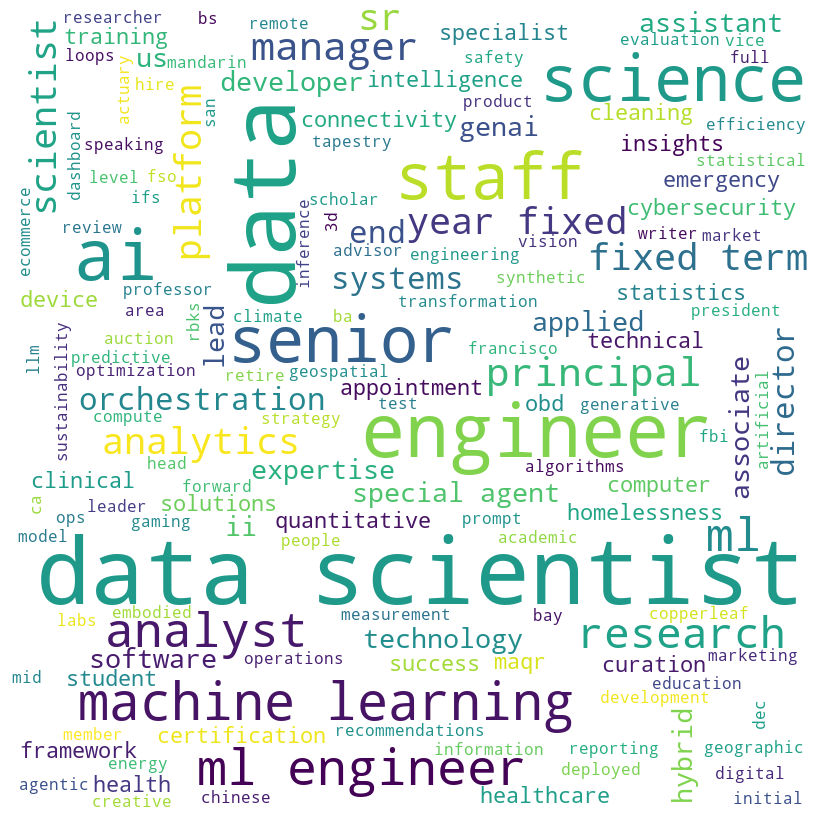

In [44]:
DATA = list(job_listings.Job)

print("Analyzing {} jobs from Indeed.com with search: \n Subject Area = {} \n Location = {} \n Salary {}".format(len(DATA),area,location,min_salary))
   
comment_words = ''
stopwords = set(STOPWORDS)
ADDWORDS = {'work',"need","location","working",
            "employee","will","benefits","compensation",
           "must", "may","company",'candidate','position','job'}
stopwords.update(ADDWORDS)

for val in DATA:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
name = "WordCloud_JobNames_" + str(len(list(job_listings.Job))) + '_search_' + area + '_' + location + '_' + str(min_salary) + '.png'
wordcloud.to_file(name)